In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Loading the Dataset
#http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
#data frame
df = pd.read_csv(url, names=names)

In [4]:
print(df.describe())

                 id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
count  6.990000e+02       699.000000         699.000000          699.000000   
mean   1.071704e+06         4.417740           3.134478            3.207439   
std    6.170957e+05         2.815741           3.051459            2.971913   
min    6.163400e+04         1.000000           1.000000            1.000000   
25%    8.706885e+05         2.000000           1.000000            1.000000   
50%    1.171710e+06         4.000000           1.000000            1.000000   
75%    1.238298e+06         6.000000           5.000000            5.000000   
max    1.345435e+07        10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_cell_size  bland_chromatin  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.43

In [5]:
# Preprocess the data
# ? =missing values in dataset; -9999 means ignore them
df.replace('?',-9999,inplace=True)
print(df.axes)
#class= 4=>malignant(cancerous) ,2=>benign

#drop 'id' column because it does not contributes to dataset and may result in overfitting
df.drop(['id'],1,inplace=True)

#shape of dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [6]:
#Dataset Visualization
print(df.describe())



       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_cell_size  bland_chromatin  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.438364   
min             1.000000                     1.000000         1.000000   
25%             1.000000                    

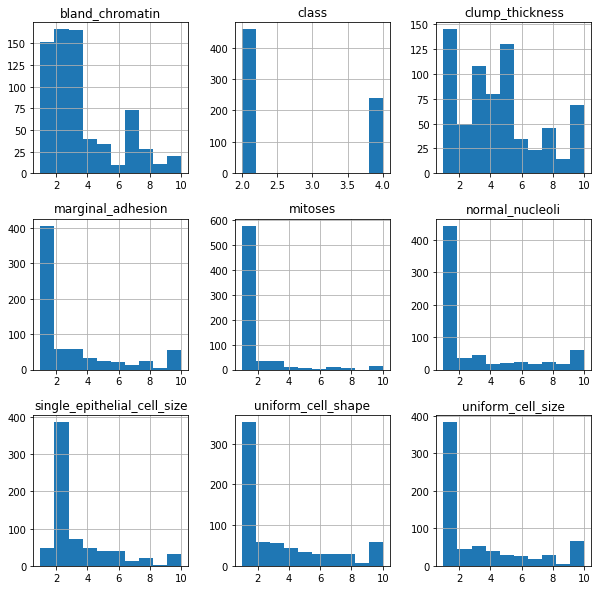

In [7]:
#Plot histograms for each feature to understand distribution
df.hist(figsize=(10,10))
plt.show()

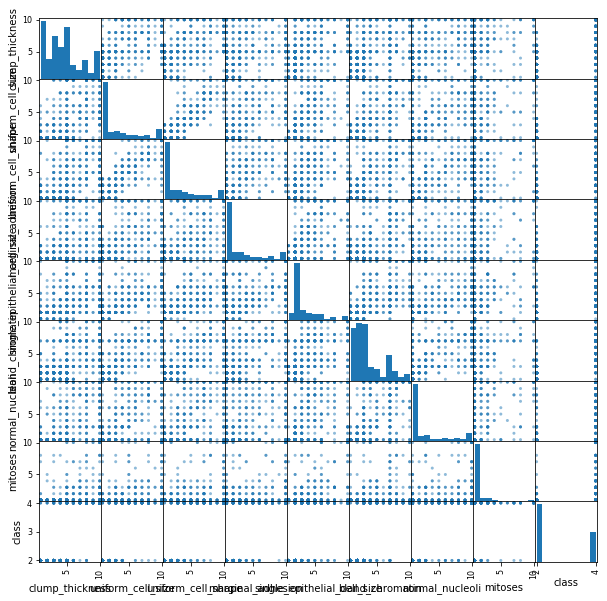

In [8]:
# Create scatter plot matrix
#tells whether linear classifier will work good for the dataset or not
#and to know realtionship between features
scatter_matrix(df,figsize=(10,10))
plt.show()


In [9]:

#create X and Y datasets for training 
print(df.loc[0])
X = np.array(df.drop(['class'],1))
print(X[0])
y = np.array(df['class'])
print(y[0])
print(X.shape,y.shape)
# No_of_rows X no_of_columns
#(no_of_rows,) => n X 1 vector or n-dim vector
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2) #a random split into training and test sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



clump_thickness                5
uniform_cell_size              1
uniform_cell_shape             1
marginal_adhesion              1
single_epithelial_cell_size    2
bare_nuclei                    1
bland_chromatin                3
normal_nucleoli                1
mitoses                        1
class                          2
Name: 0, dtype: object
[5 1 1 1 2 '1' 3 1 1]
2
(699, 9) (699,)
(559, 9) (559,)
(140, 9) (140,)


In [10]:
#specify testing parameters
seed = 8 #not a random seed for reproducable results
scoring = 'accuracy'

In [11]:
#define the models to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))# odd value to avoid ties 
models.append(('SVM',SVC()))

#Evaluate each model
results = []
names = []

for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed) #run 10 times and select the best results
    cv_results =model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring) #fitting a model and computing the score
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg) #accuracy only on training data
print(results)

KNN: 0.964253 (0.026465)
SVM: 0.958929 (0.026547)
[array([0.98214286, 0.98214286, 0.92857143, 0.96428571, 0.94642857,
       0.96428571, 1.        , 0.91071429, 0.98214286, 0.98181818]), array([0.96428571, 0.98214286, 0.96428571, 0.94642857, 0.92857143,
       0.92857143, 0.94642857, 0.92857143, 1.        , 1.        ])]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [12]:
#Make predictions on validation dataset

for name,model in models:
    model.fit(X_train,y_train) #training the model
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9785714285714285
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        87
           4       0.96      0.98      0.97        53

   micro avg       0.98      0.98      0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.9642857142857143
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        87
           4       0.91      1.00      0.95        53

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
clf =SVC()

clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

example=np.array([[4,2,1,1,1,2,3,2,5]])
# print(example.shape)
# print(example)
# example=example.reshape(len(example),-1) #row to column vector
# print(example.shape)
# print(example)

prediction=clf.predict(example)
print(prediction)

0.9642857142857143
[4]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
